In [6]:
url='https://raw.githubusercontent.com/Nikhil14384/Feature_Engineering/main/Handling%20missing%20values/titanic.csv'


In [2]:
import pandas as pd
import numpy as np

## **Arbitrary Value Imputation**

this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [3]:
df=pd.read_csv(url,usecols=['Age','Survived','Fare'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
def impute_arbi(df,variable):
  df[variable+'_zero']=df[variable].fillna(0)
  df[variable+'_hundred']=df[variable].fillna(100)



**Advantages**

Easy to implement

Captures the importance of missingess if there is one

**Disadvantages**

Distorts the original distribution of the variable

If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution

Hard to decide which value to use

## **How To Handle Categroical Missing Values**

**Frequent Category Imputation**

In [4]:
url='https://raw.githubusercontent.com/Nikhil14384/Feature_Engineering/main/Handling%20missing%20values/house_price.csv'

In [57]:
df=pd.read_csv(url, usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
df.head(20)

In [60]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [61]:
df.isnull().mean()*100

BsmtQual        2.534247
FireplaceQu    47.260274
GarageType      5.547945
SalePrice       0.000000
dtype: float64

Compute the frequency with every feature

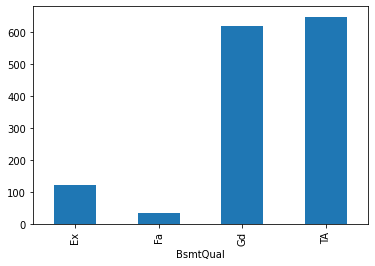

In [62]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

In [63]:
fre_bsmt=df.BsmtQual.mode()[0]
fre_bsmt

'TA'

In [64]:
fre_garage=df.GarageType.mode()[0]

In [65]:
def impute_freq(df,variable):
  mfc=df[variable].mode()[0]
  df[variable].fillna(mfc,inplace=True)
  


In [68]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
  impute_freq(df,feature)

In [69]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

**Advantages**

Easy To implement

Fater way to implement 

**Disadvantages**

Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's

It distorts the relation of the most frequent label

**Adding a variable to capture NaN**

In [81]:
df=pd.read_csv(url, usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [82]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)

In [ ]:
df.head(20)

In [84]:
mfc=df['FireplaceQu'].mode()[0]
df.FireplaceQu.fillna(mfc,inplace=True)

In [85]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_var
0,Gd,Gd,Attchd,208500,1
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,Gd,Attchd,143000,1
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


**Suppose if you have more frequent categories, we just replace NAN with a new category**

In [98]:
df=pd.read_csv(url, usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [99]:
df.shape

(1460, 4)

In [100]:
def impute_new(df,variable):
  df[variable]=np.where(df[variable].isnull(),"missing",df[variable])

In [101]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
  impute_new(df,feature)

In [102]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [103]:
df.shape

(1460, 4)

**One Hot Encoding**

In [7]:
df=pd.read_csv(url,usecols=['Sex'])

In [9]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [10]:
df=pd.read_csv(url,usecols=['Embarked'])

In [11]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)